This project uses a public dataset from Kaggle located [**here**](https://www.kaggle.com/uciml/autompg-dataset) to build a model that can predict the miles per gallon(MPG) which is the primary measurement of a cars efficiency.

It contains the following columns: mpg, cylinders, horsepower, weight, acceleration, model year and origin.

Origin is a categorical value from 1 to 3 believed to represent certain regions with 1 being USA, 2 is Europe and 3 is Asia.

# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset

In [ ]:
dataset = pd.read_csv('/content/auto_mpg.csv')
dataset.head()

,car name,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,1,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,1,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,1,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,1,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,1,17.0


In [ ]:
#Get information on the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car name      398 non-null    object 
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   mpg           398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


# Data Preprocessing
Data preprocessing helps to minimize potential errors in the model by ensuring that the dataset is accurate. A model is as good as the data passed into it.

In [ ]:
#Drop rows with missing values
dataset = dataset.dropna()

In [ ]:
#Sum the number of missing values
dataset.isnull().sum()

car name        0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
mpg             0
dtype: int64

In [ ]:
#Drop columns that won't add value to the value
dataset.drop('car name', axis='columns', inplace=True)

In [ ]:
#The column 'car name' is no longer a part of our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


# Exploratory Data Analysis (EDA)
EDA gives insight into the data to understand the trends or patterns in the dataset

A correlation map (or correlation matrix) is a visual tool that illustrates the relationship between the matrix of features and dependent variable vector in the dataset.

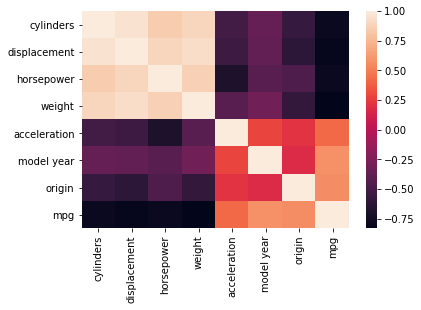

In [ ]:
#Find correlations between different columns of the dataset
import seaborn as sns
corr = dataset.corr()
sns.heatmap(corr)
plt.show()

Seaborn's heatmap is plotted to show the relationship between different features. The matrix is lighter when the columns represented move in the same direction together and it's darker when one column decreases while the other increases.

From the correlation matrix, there's obviously a strong correlation between mpg, cylinders, displacement, horsepower and weight. Acceleration also shows a strong relationship with horsepower and this makes sense since the greater the horsepower, the higher the acceleration.

Take a quick look at this relationship in the Seaborn plot below.

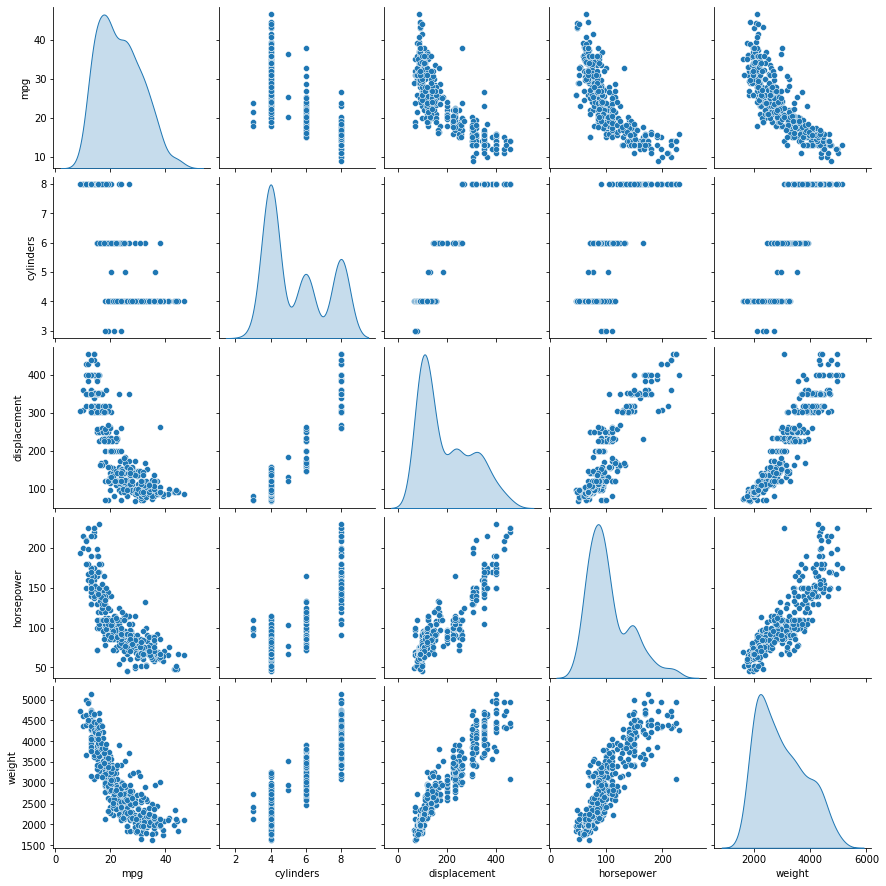

In [ ]:
sns.pairplot(dataset[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']], diag_kind='kde')

Let's plot the number of cars based on their origin(USA = 1, Europe = 2, Asia = 3). This plot is based on the assumption that different regions have different fuel efficiency priorities.

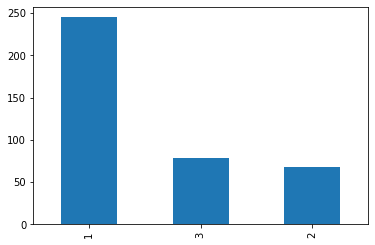

In [ ]:
pd.value_counts(dataset['origin']).plot.bar()

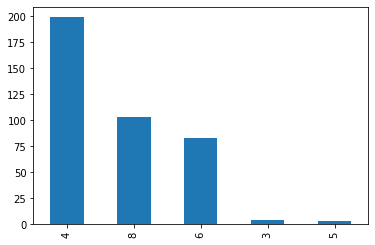

In [ ]:
#View the distribution of different cylinder counts in the dataset.
pd.value_counts(dataset['cylinders']).plot.bar()

A box plot is used to better visualize the dataset. Seaborn's builtin boxplot method is used to plot car origin against the mpg.

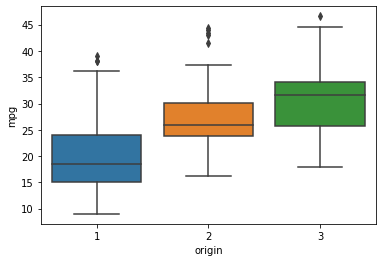

In [ ]:
sns.boxplot(x=dataset["origin"], y=dataset["mpg"])
plt.show()

From the plot, Asian cars have significantly higher mpg than cars from other regions.

# OneHotEncode dataset

The 'origin' column is categorical and not numeric so it's OneHotEncoded using pandas get_dummies.

In [ ]:
dataset['origin'] = dataset['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [ ]:
dataset = pd.get_dummies(dataset, columns=['origin'], prefix='', prefix_sep='')
dataset.tail()

,cylinders,displacement,horsepower,weight,acceleration,model year,mpg,Europe,Japan,USA
393,4,140.0,86.0,2790,15.6,82,27.0,0,0,1
394,4,97.0,52.0,2130,24.6,82,44.0,1,0,0
395,4,135.0,84.0,2295,11.6,82,32.0,0,0,1
396,4,120.0,79.0,2625,18.6,82,28.0,0,0,1
397,4,119.0,82.0,2720,19.4,82,31.0,0,0,1


# Split dataset into training set and test set

The dataset is split into training and test sets using the train_test_split class from Scikit learn. The training phase is where the model generates intuition about the data and the testing phase is where the model performs against the data to produce an outcome.

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.25, shuffle=True)
print(len(train_set), 'training set')
print(len(test_set), 'test set')

294 training set
98 test set


In [ ]:
#Seperate the column to predict from the features
train_set_label = train_set.pop('mpg')
test_set_label = test_set.pop('mpg')

# Train Regression Algorithms on the training dataset

In this project, Decision Tree, Random Forest and XGBoost regressors are used to create and train the model. Since multiple algorithms are used to build the model, the accuracy score after testing will be compared and the most accurate algorithm picked.

In [ ]:
#Import the regression algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#instantiate training models
dt_regressor = DecisionTreeRegressor(random_state = 0)
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
xgb_regressor = XGBRegressor()

#fit the models on the training set
dt_regressor.fit(train_set, train_set_label)
rf_regressor.fit(train_set, train_set_label)
xgb_regressor.fit(train_set, train_set_label)

[08:51:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
#Predict test set results
dt_pred = dt_regressor.predict(test_set)
rf_pred = rf_regressor.predict(test_set)
xgb_pred = xgb_regressor.predict(test_set)

# Find the Mean Squared Error

The mean squared error (MSE) helps us understand how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squares them.

Scikit learn's built in mean_squared_error() method is used to test our regression models and math.sqrt() is used to get the root mean squared error(RMSE).

The lowest RMSE value proves to be the best algorithm as it has predicted the closest to the actual value.

In [ ]:
from sklearn.metrics import mean_squared_error
import math

accuracy = dict()

accuracy['DecisionTree'] = math.sqrt(mean_squared_error(test_set_label, rf_pred))
accuracy['RandomForest'] = math.sqrt(mean_squared_error(test_set_label, dt_pred))
accuracy['XGBoost'] = math.sqrt(mean_squared_error(test_set_label, xgb_pred))

print(accuracy)

{'DecisionTree': 2.457157807263489, 'RandomForest': 3.3686277712481814, 'XGBoost': 2.3767859215859564}


,Algorithms,Root Mean Squared Error
0,DecisionTree,2.457158
1,RandomForest,3.368628
2,XGBoost,2.376786


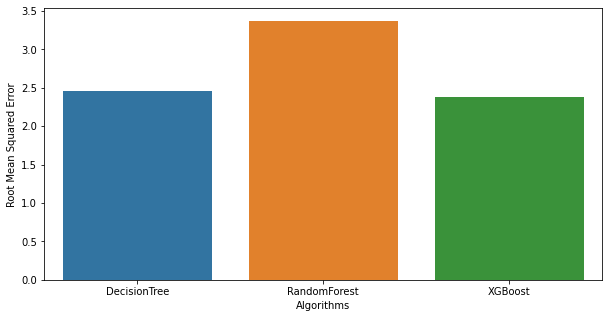

In [ ]:
#Plot the performance of the algorithms
fig, (ax1) = plt.subplots(ncols=1, sharey=True,figsize=(10,5))
new_df=pd.DataFrame(list(accuracy.items()),columns=['Algorithms','Root Mean Squared Error'])
display(new_df)
sns.barplot(x="Algorithms", y="Root Mean Squared Error", data=new_df,ax=ax1)

In [ ]:
max_accuracy = min(accuracy, key=accuracy.get)
print(max_accuracy)

XGBoost


XGBoost performs the best with an RMSE value of 2.3. This means that this model is decently reliable for this dataset.

# Conclusion

In this project, a model was built that can reliably predict a car's mpg. This model can be trained with new datasets and used to predict future mpg ratings for future car designs giving car manufacturing companies insight to produce more efficient cars.